In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./data/train_V2.csv")

In [3]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
data.shape

(4446966, 29)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [6]:
newdict = dict(enumerate(set(data.matchType), 1))

In [7]:
flipped_dict = dict(zip(newdict.values(), newdict.keys()))

In [8]:
flipped_dict

{'crashfpp': 16,
 'crashtpp': 15,
 'duo': 14,
 'duo-fpp': 1,
 'flarefpp': 8,
 'flaretpp': 11,
 'normal-duo': 12,
 'normal-duo-fpp': 9,
 'normal-solo': 5,
 'normal-solo-fpp': 2,
 'normal-squad': 4,
 'normal-squad-fpp': 7,
 'solo': 6,
 'solo-fpp': 3,
 'squad': 13,
 'squad-fpp': 10}

In [9]:
newlist = data.matchType.copy()
for i, value in enumerate(data.matchType):
    newlist[i] = flipped_dict[data.matchType[i]]

In [10]:
data.matchType = newlist

Id: gamer id  
groupId:  
matchId:  
assists:  
boosts: item in a game which makes you and your run fast  
damageDealt:  
DBNOs: Down But Not Out (Your teamate saved you from a devil)  
headshotKills:  
killPlace: rank of number of kills you make  
killPoints: 
kills:  
killStreaks:  
longestKill

In [11]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

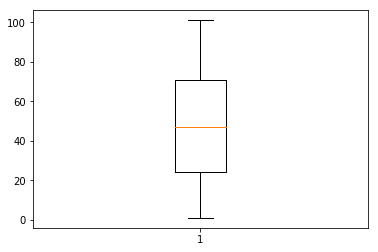

In [12]:
p1 = plt.boxplot(data.killPlace)

In [13]:
xTrainTest = np.array(data.drop(['Id', 'groupId', 'matchId', 'winPlacePerc'], axis=1))

In [14]:
yTrainTest = np.array(data.winPlacePerc)

In [15]:
int(xTrainTest.shape[0]/3)

1482322

In [16]:
indexes = np.random.choice(xTrainTest.shape[0],size=int(xTrainTest.shape[0]/3),replace=False)

In [17]:
data2 = pd.read_csv("./data/test_V2.csv")

In [18]:
xTest = data2.drop(['Id', 'groupId', 'matchId'], axis=1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xTrainTest, yTrainTest, test_size=0.4, random_state=0)

In [20]:
[X_train.shape, X_test.shape, y_train.shape, y_test.shape]

[(2668179, 25), (1778787, 25), (2668179,), (1778787,)]

In [21]:
from sklearn.svm import SVR

In [22]:
X_train = X_train.astype('float64')

In [ ]:
clf = SVR(gamma=0.01, C=1.0, epsilon=0.2)

In [ ]:
clf.fit(X_train, y_train) 

In [ ]:
# from sklearn.svm import SVR
# import numpy as np
# n_samples, n_features = 10, 5
# np.random.seed(0)
# y = np.random.randn(n_samples)
# X = np.random.randn(n_samples, n_features)